In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen= ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen=ImageDataGenerator(rescale=1./255)
train_dir='/Users/samara/Desktop/AI:ML/brain tumor/dataset/Training'
test_dir='/Users/samara/Desktop/AI:ML/brain tumor/dataset/Testing'

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical'
)
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical'
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [7]:
print(train_generator)

(32, 4)


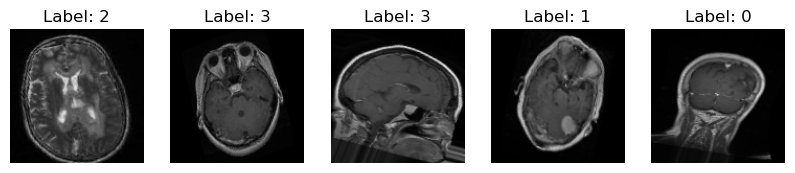

In [52]:
import matplotlib.pyplot as plt
import numpy as np
images,labels= next(train_generator)
print(labels.shape)
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(images[i])
    plt.title(f"Label: {np.argmax(labels[i])}")
    plt.axis('off')
plt.show()

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=test_generator
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 64s 352ms/step - accuracy: 0.5371 - loss: 1.0429 - val_accuracy: 0.6438 - val_loss: 0.9230
Epoch 2/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 64s 357ms/step - accuracy: 0.7460 - loss: 0.6520 - val_accuracy: 0.7025 - val_loss: 0.8457
Epoch 3/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 66s 366ms/step - accuracy: 0.7816 - loss: 0.5588 - val_accuracy: 0.6278 - val_loss: 0.9670
Epoch 4/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 67s 372ms/step - accuracy: 0.8187 - loss: 0.4715 - val_accuracy: 0.7948 - val_loss: 0.5205
Epoch 5/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 65s 365ms/step - accuracy: 0.8536 - loss: 0.3990 - val_accuracy: 0.8230 - val_loss: 0.4247
Epoch 6/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 65s 360ms/step - accuracy: 0.8532 - loss: 0.3987 - val_accuracy: 0.7796 - val_loss: 0.6505
Epoch 7/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 64s 356ms/step - accuracy: 0.8712 - loss: 0.3554 - val_accuracy: 0.8574 - val_loss: 0.3356
Epoch 8/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 68s 379ms/step - accuracy: 0.8682 - loss: 0

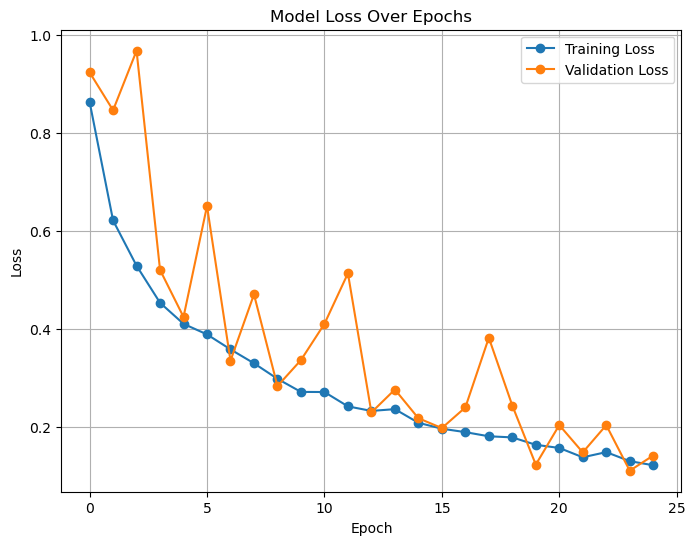

[0.9229791164398193, 0.8457263112068176, 0.966961681842804, 0.5205168724060059, 0.42473098635673523, 0.6505170464515686, 0.3356320858001709, 0.4706653356552124, 0.283941388130188, 0.33688247203826904, 0.41065719723701477, 0.5134779810905457, 0.230203777551651, 0.2768816351890564, 0.21843858063220978, 0.19837157428264618, 0.24037835001945496, 0.3823259472846985, 0.24422845244407654, 0.12393289804458618, 0.20447729527950287, 0.14887934923171997, 0.204351544380188, 0.111514151096344, 0.1425110548734665]


In [58]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()